## Artificial Neural Network : Car Sales Prediction Model


In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [214]:
car_data = pd.read_csv('Car_Purchasing_Data.csv', encoding = 'ISO-8859-1')  # The data has different special characters in use
car_data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [215]:
car_data.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


#### Visualize Dataset

In [216]:
# sns.pairplot(car_data)

## Training and Testing sets | Cleaning


In [217]:
car_data_clean = car_data.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
car_data_clean.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [218]:
X = car_data_clean # Inputs
y = car_data['Car Purchase Amount'] #Outputs

In [219]:
X.shape, y.shape

((500, 5), (500,))

#### For Normalization

In [220]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled, X_scaled.shape

(array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
        [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
        [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
        ...,
        [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
        [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
        [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]]),
 (500, 5))

In [221]:
scaler.data_max_, scaler.data_min_

(array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06]),
 array([    0.,    20., 20000.,   100., 20000.]))

In [222]:
y = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)
y_scaled, y_scaled.shape

(array([[0.37072477],
        [0.50866938],
        [0.47782689],
        [0.82285018],
        [0.66078116],
        [0.67059152],
        [0.28064374],
        [0.54133778],
        [0.54948752],
        [0.4111198 ],
        [0.70486638],
        [0.46885649],
        [0.27746526],
        [0.56702642],
        [0.57056385],
        [0.61996151],
        [0.46217916],
        [0.49157341],
        [0.50188722],
        [0.64545808],
        [0.59339372],
        [0.48453965],
        [0.53860366],
        [0.53007738],
        [0.50814651],
        [0.49841668],
        [0.3966416 ],
        [0.56467566],
        [0.6950749 ],
        [0.49287831],
        [0.12090943],
        [0.50211776],
        [0.80794216],
        [0.62661214],
        [0.43394857],
        [0.60017103],
        [0.42223485],
        [0.01538345],
        [0.37927499],
        [0.64539707],
        [0.51838974],
        [0.45869677],
        [0.26804521],
        [0.2650104 ],
        [0.84054134],
        [0

## Training the Model

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)
X_train.shape

(375, 5)

In [224]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(40, input_dim = 5, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [225]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 40)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [226]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [227]:
epochs_hist = model.fit(X_train, y_train, epochs=210, batch_size=25, verbose = 1, validation_split = 0.2)

Epoch 1/210


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0595 - val_accuracy: 0.0133 - val_loss: 0.0321
Epoch 2/210
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0011 - loss: 0.0235 - val_accuracy: 0.0133 - val_loss: 0.0173
Epoch 3/210
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0023 - loss: 0.0130 - val_accuracy: 0.0133 - val_loss: 0.0114
Epoch 4/210
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0042 - loss: 0.0082 - val_accuracy: 0.0133 - val_loss: 0.0095
Epoch 5/210
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0034 - loss: 0.0078 - val_accuracy: 0.0133 - val_loss: 0.0081
Epoch 6/210
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0052 - loss: 0.0050 - val_accuracy: 0.0133 - val_loss: 0.0072
Epoch 7/210
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0028 - loss: 0.0051 - val_accuracy: 0.0133 - val_loss: 0.0063
Epoch 8/210
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0014 - loss: 0.0031 - val_accuracy: 0.0133 - val_loss

In [228]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

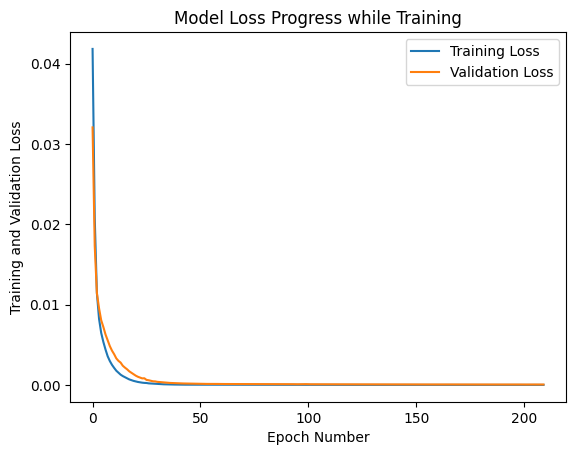

In [229]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress while Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [230]:
results = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 5.3809e-05  


In [231]:
print(f'Test Accuracy: {results[1]* 100:.2f}%')

Test Accuracy: 0.00%


In [232]:
X_testing = np.array([[1, 50, 50000, 10985, 629312]])
y_predict = model.predict(X_testing)
print('Expected Purchase Amount=', y_predict[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Expected Purchase Amount= [296071.12]
